<a href="https://colab.research.google.com/github/GuptaGarima787/Chat-app/blob/master/Handwritten_Digit_Recognition_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching Dataset

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

In [5]:
x,y = mnist['data'],mnist['target']

In [8]:
x.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [14]:
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

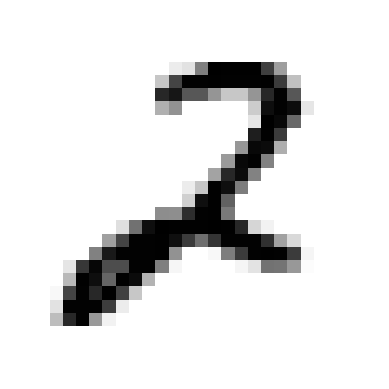

In [16]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')



In [17]:
y[36001]

'2'

In [18]:
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

In [19]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train.to_numpy()[shuffle_index],y_train.to_numpy()[shuffle_index]

Creating a 2 detector

In [26]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)


In [27]:
y_train

array([5, 0, 5, ..., 6, 9, 6], dtype=int8)

In [24]:
from sklearn.linear_model import LogisticRegression


In [29]:
clf = LogisticRegression(tol=0.1)


In [30]:
clf.fit(x_train,y_train_2)

LogisticRegression(tol=0.1)

In [31]:
clf.predict([some_digit])

array([ True])

In [34]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

In [35]:
a.mean()

0.9790166666666668